# CS4055 - Group 3

Brian Heaphy - 14160846

Zach Hyland - 15181014

Patrick Cruz - 15160238

Robert Laffan - 14169355

Dataset: https://www.kaggle.com/lantanacamara/hong-kong-horse-racing#race-result-horse.csv

In [1]:
# Tools
from random import randint
import array
from collections import Counter

# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [2]:
# Read in dataset
df = pd.read_csv("race-result-horse.csv")
df_example = df.head(10)

## Dataset Analysis

The dataset we've chosen to use for our project is a set of all Hong Kong horse races from 2013-2017.

Our ultimate goal will be to create a predicitive model using this dataset that can accurately predict who the winner of each race was.

Lets take a look at our dataset:

Below, we use df.info() to display how many records and features our dataset has, as well as the types of each feature.

+ We have 24151 records and 17 features.

Lets look at these features in more detail:

- finishing_position -> Where the horse finished after the race. This is what we will try to predict. We will drop it from the training dataset.
- horse_number -> The number given to the horse for the race. Not useful for our predicitive model.
- horse_name -> The name of the horse. This could be helpful. Perhaps a certain horse wins often.
- horse_id -> Basically the same as the horses name but in numerical format. We can chose one to work with.
- jockey - Who the rider of the horse was. Perhaps some jockeys get better horses and win more often?
- trainer - The horses trainer. Perhaps some trainers have better horses and have more winners.
- actual_weight - This is the total weight handicap given to a horse.
- draw -> The starting position of the horse. This may be useful. Perhaps certain starting positions are favourable.
- length_behind_winner -> The distance the horse finished behind 1st place. We will ignore this as our model will try to predict who the winner was without definitive information.
- running_position_1 -> The position of the horse at the first quarter of the race. This could be useful for our models.
- running_position_2 -> The position of the horse at halfway point of the race. This could be useful for our models.
- running_position_3 -> The position of the horse after the third quarter of the race. We may or may not include this.
- running_position_4 -> The position of the horse at the end of the race. We will ignore this.
- finish_time -> Time it took the horse to finish. We will likely remove this is at won't be much use with different race lengths and unknown conditions muddying its usefulness.
- win_odds -> The odds given to the horse to win the race. We may included this in our model or we can use this for comparisson with our own findings.
- race_id -> ID number given to the race. Not important for us.

In [3]:
# Here we can see the current data types of each field.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30189 entries, 0 to 30188
Data columns (total 16 columns):
finishing_position      30187 non-null float64
horse_number            29851 non-null float64
horse_name              30189 non-null object
horse_id                30189 non-null object
jockey                  30160 non-null object
trainer                 30189 non-null object
actual_weight           30189 non-null object
draw                    29598 non-null float64
length_behind_winner    29598 non-null object
running_position_1      29574 non-null float64
running_position_2      29560 non-null float64
running_position_3      29542 non-null float64
running_position_4      16618 non-null float64
finish_time             29520 non-null object
win_odds                29598 non-null float64
race_id                 30189 non-null object
dtypes: float64(8), object(8)
memory usage: 3.7+ MB


In [4]:
df.describe()

,finishing_position,horse_number,draw,running_position_1,running_position_2,running_position_3,running_position_4,win_odds
count,30187.000000,29851.000000,29598.000000,29574.000000,29560.000000,29542.000000,16618.000000,29598.000000
mean,6.979859,6.885397,6.862051,6.833942,6.831326,6.826992,6.942472,30.255274
std,3.830520,3.751176,3.742622,3.727267,3.725933,3.724886,3.798080,31.623839
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7.700000
50%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,16.000000
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,41.000000
max,14.000000,14.000000,15.000000,14.000000,14.000000,14.000000,14.000000,99.000000


Above, we can see a few things.

- The most horses in any race was 14.
- The lowest odds given to any horse was 1/1
- The highest odds given to any horse was 99/1

It's also clear that a lot of features are missing here. In order to use a lot of this data for our machine learning algorithms, we will have to convert the features into numeric ones.


In [5]:
df.head(10)

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,race_id
0,1.0,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1.0,-,1.0,2.0,2.0,1.0,1.22.33,3.8,2014-001
1,2.0,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,13.0,2,8.0,9.0,9.0,2.0,1.22.65,8.0,2014-001
2,3.0,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,3.0,2,2.0,1.0,1.0,3.0,1.22.66,5.7,2014-001
3,4.0,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,2.0,2,6.0,4.0,5.0,4.0,1.22.66,6.1,2014-001
4,5.0,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,9.0,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,2014-001
5,6.0,9.0,WINNING ADVANTAGE,N359,A Suborics,A T Millard,123,11.0,5-1/2,12.0,13.0,13.0,6.0,1.23.20,24.0,2014-001
6,7.0,13.0,CARE FREE ELEGANCE,P340,C Y Ho,K L Man,115,12.0,5-1/2,4.0,3.0,3.0,7.0,1.23.22,99.0,2014-001
7,8.0,4.0,COOL PAL,S035,H W Lai,L Ho,129,8.0,5-3/4,5.0,6.0,6.0,8.0,1.23.25,21.0,2014-001
8,9.0,6.0,TAI PO FORTUNE,P081,K Teetan,T P Yung,127,6.0,6-1/4,7.0,7.0,7.0,9.0,1.23.33,10.0,2014-001
9,10.0,11.0,SUPER HORSE,L308,T H So,C W Chang,119,7.0,6-3/4,11.0,11.0,12.0,10.0,1.23.41,27.0,2014-001


From the table above we can see once again that a lot of data munging will be required to make some of the data usable. We can see that some features contain NaN values (i.e. not a number) and these will have to be cleaned up before we can start building our models.

### Lets see what's missing

In [6]:
total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '% Missing'])
missing_data.head(17)

,Total,% Missing
finishing_position,2,0.006625
horse_number,338,1.119613
horse_name,0,0.000000
horse_id,0,0.000000
jockey,29,0.096061
trainer,0,0.000000
actual_weight,0,0.000000
draw,591,1.957667
length_behind_winner,591,1.957667
running_position_1,615,2.037166


As you can see above, there are quite a few features with missing values. Luckily, many of them are easily fixed.

#### running_position_4
Nearly half of all records are missing data for this feature and as a result, it is best we remove it from our dataset.

#### horse_number
This data provides no benefit to us in creating a predicitive model so we can remove it from the dataset.

#### finishing_position
Since there are two rows missing the finishing position, we will remove them from the dataset.

#### jockey
There are 24 records where the jockey's name is missing. Since there are so few rows affected by this, we will simply remove them from the dataset.

#### length_behind_winner
Since we are trying to predict if a horse won it's race using other information, we will drop this column as there is a direct correlation between it and, winning or losing.

#### running_position_1, 2 and 3
This one requires a little more consideration than some of the others. We can see that there is roughly 2.03% of all records missing rp1 (running_position_1), roughly 2.08% missing rp2 and about 2.14% off all records missing rp3.

The likely scenario for this is that the horse did not make it to these stages, rather than the data being forgotten.

The missing % for rp1 and rp2 are so similar because they are most likely the result of horses refusing to run at the start of the race. The missing % for rp2 does not increase much in comparisson to rp1, because if a horse did start it is very unlikely to drop out before the halfway mark.

Finally, rp3 increases slightly more noticably as it would be more likely for a horse to drop out near the end of the race if it was in a poor position and had no chance of placing.

As a result of these considerations we will replace all of these missing values with '14', the lowest finishing position, as dropping out is essentially finishing in last place.

#### finish_time
We will drop finishing time from our dataset as it won't be much use when trying to create a predictive model. There may be many different race lengths which we can't account for, as well as things such as weather conditions that will make the finishing times worthless to us.

#### win_odds
In the case of missing odds values, we'll replace the null values with the mean win_odds.


### How it looks afterwards:

In [7]:
# Drop running position 4
df = df.drop(['running_position_4'], axis=1)

# Drop horse number
df = df.drop(['horse_number'], axis=1)

# Drop rows missing finishing position
df = df.dropna(axis=0, subset=['finishing_position'])
# Make finishing_position an int (was previosuly a float)
df['finishing_position'] = df['finishing_position'].astype(int)

# Drop rows missing jockey
df = df.dropna(axis=0, subset=['jockey'])

# Fill draw null vals with a random value from the draw col
df['draw'] = df['draw'].fillna(13)
df['draw'] = df['draw'].astype(int)

# Drop distance_behind_winner
df = df.drop(['length_behind_winner'], axis=1)

# Fill null running_position_1, 2 and 3 values with 14
df['running_position_1'] = df['running_position_1'].fillna(14)
df['running_position_1'] = df['running_position_1'].astype(int)
df['running_position_2'] = df['running_position_2'].fillna(14)
df['running_position_2'] = df['running_position_2'].astype(int)
df['running_position_3'] = df['running_position_3'].fillna(14)
df['running_position_3'] = df['running_position_3'].astype(int)

# Drop finishing time
df = df.drop(['finish_time'], axis=1)

# Fill null win_odds with mean
df['win_odds'] = df['win_odds'].fillna(df['win_odds'].mean())

# We can drop race ID also as it wont be of any use to us
df = df.drop(['race_id'], axis=1)

# We can drop horse_name as horse_id will be more suitable
df = df.drop(['horse_name'], axis=1)

total = df.isnull().sum()
percent = df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '% Missing'])
missing_data.head(17)

,Total,% Missing
finishing_position,0,0.0
horse_id,0,0.0
jockey,0,0.0
trainer,0,0.0
actual_weight,0,0.0
draw,0,0.0
running_position_1,0,0.0
running_position_2,0,0.0
running_position_3,0,0.0
win_odds,0,0.0


## Reduce the size of the dataset

Due to the large size of the dataset with 30000 rows, we decided to reduce it's size in order to make it easier to manage and process for this project.

We will settle on 10000 rows.

In [8]:
df = df.head(10000)

## Features & Feature Engineering

### 1. Horse ID

In [9]:
horses = df['horse_id'].unique()
horses.size

1316


This tells us that in our dataset we have 1316 unique horses.


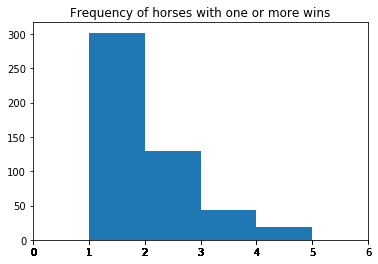

In [10]:
winners = df.loc[df['finishing_position'] == 1]
wins = []

for h in horses:
    w = 0
    for row in winners['horse_id']:
        if(h == row):
            w+=1

    wins.append(w)



plt.hist(wins, bins=[1,2,3,4,5], align='mid')
plt.title("Frequency of horses with one or more wins")
plt.gca().set_xticks(wins)
plt.show()

This shows us that some horses do have a history of more wins than others. 

Roughly 300 horses have won 1 race in our dataset.
Over 120 horses have won twice.
Almost 50 horses have won 3 times.
Just under 25 horses in the dataset have won 4 times.

Considering we have 1316 unique horses in our training set and roughly 300 horses with 1 win and 200 horses with at least 2 wins, we should be able to confidently say that a horse with 1 win or more is likely to win again. This should be a consideration for our model.

### Creating 'horse_wins'

In order to use the horse's wins as part of our calculations later on, we will create a new feature in the place of 'horse_id' and call it 'horse_wins'. The 'horse_wins' column will be much more suitable for designing a machine learning algorithm as the number of wins a horse has is more imidediately useful than it's id number.

Lets create 'horse_wins'.

In [11]:
# This makes a dict with the horse id corresponding to their wins
horse_win_dict = dict(zip(horses, wins))

df['horse_wins'] = df['horse_id']
df['horse_wins'] = df['horse_wins'].map(horse_win_dict)
df['horse_wins'] = df['horse_wins'].fillna(0)
df['horse_wins'] = df['horse_wins'].astype(int)

With our new feature 'horse_wins' successfully created, we can drop 'horse_id'.

In [12]:
df = df.drop(['horse_id'], axis=1)

### 2. Jockey

In [13]:
jockeys = df['jockey'].unique()
jockeys.size

61

As we can see above, our dataset contains 61 unique jockeys.

Lets take a look at their wins.

In [14]:
winners = df.loc[df['finishing_position'] == 1]
wins = []

for j in jockeys:
    w = 0
    for row in winners['jockey']:
        if(j == row):
            w+=1

    wins.append(w)


win_df = df.loc[df['finishing_position'] == 1]

jockey_wins = win_df[['jockey','finishing_position']]

jockey_wins.groupby('jockey').count().sort_values(['finishing_position'], ascending=False)

,finishing_position
jockey,
J Moreira,147
Z Purton,95
D Whyte,75
B Prebble,48
N Callan,47
G Mosse,37
C Y Ho,33
N Rawiller,29
K Teetan,29


Text(0.5, 0, 'jockey')

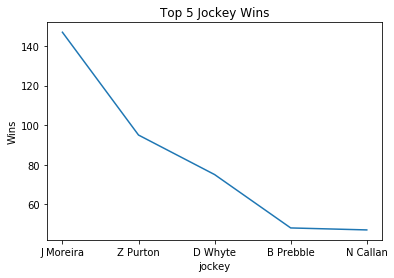

In [15]:
plt.plot(jockey_wins.groupby('jockey').count().sort_values(['finishing_position'], ascending=False).head(5))
plt.title('Top 5 Jockey Wins')
plt.ylabel('Wins')
plt.xlabel('jockey')

From examining the jockey data in the training set, we can determine that the rider of the horse can give us a large indication of whether or not the horse is likely to be a winner.

J Moreira for instance is the most decorated jockey with nearly 150 winners to his name. If we were to find his name down as the jockey for a horse then we could raise the likelyhood of that horse winning the race substantially.

The same can be said for the other jockeys seen in the top five above, with the jockey in 5th place, N Callan, having 47 wins.

### Creating 'jockey_wins'

Similar to what we did when creating 'horse_wins', we now need to find a way to convert a jockeys name into a numerical value to demonstrate their winning capabilities.

To do this we will follow the same steps as before.

In [16]:
# This makes a dict with jockeys and their corresponding wins
jockey_win_dict = dict(zip(jockeys, wins))

df['jockey_wins'] = df['jockey']
df['jockey_wins'] = df['jockey_wins'].map(jockey_win_dict)
df['jockey_wins'] = df['jockey_wins'].fillna(0)
df['jockey_wins'] = df['jockey_wins'].astype(int)

Lets classify jockey_wins into categories.

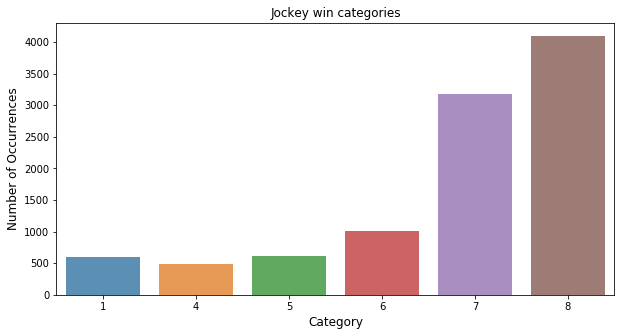

In [17]:
# Create the categories for jockey_wins
df['jockey_wins'] = df['jockey_wins'].astype(int)
df.loc[ df['jockey_wins'] <= 20, 'jockey_wins'] = 8
df.loc[(df['jockey_wins'] > 20) & (df['jockey_wins'] <= 40), 'jockey_wins'] = 7
df.loc[(df['jockey_wins'] > 40) & (df['jockey_wins'] <= 60), 'jockey_wins'] = 6
df.loc[(df['jockey_wins'] > 60) & (df['jockey_wins'] <= 80), 'jockey_wins'] = 5
df.loc[(df['jockey_wins'] > 80) & (df['jockey_wins'] <= 100), 'jockey_wins'] = 4
df.loc[(df['jockey_wins'] > 100) & (df['jockey_wins'] <= 120), 'jockey_wins'] = 3
df.loc[(df['jockey_wins'] > 120) & (df['jockey_wins'] <= 140), 'jockey_wins'] = 2
df.loc[(df['jockey_wins'] > 140) & (df['jockey_wins'] <= 160), 'jockey_wins'] = 1


jockey_count  = df['jockey_wins'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(jockey_count.index, jockey_count.values, alpha=0.8)
plt.title('Jockey win categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

Once again, since we have now created a numerical value for identifying how good a horses jockey is, we no longer require the 'jockey' column.

In [18]:
df = df.drop(['jockey'], axis=1)

### 3. Trainer

Now we'll look at how the horses trainer may be related to their chances of winning.

In [19]:
trainers = df['trainer'].unique()
trainers.size

50

There are 50 unique trainers in the dataset.

Lets see how many wins each trainer has.

In [20]:
winners = df.loc[df['finishing_position'] == 1]
wins = []

for t in trainers:
    w = 0
    for row in winners['trainer']:
        if(t == row):
            w+=1

    wins.append(w)

win_df = df.loc[df['finishing_position'] == 1]

trainer_wins = win_df[['trainer','finishing_position']]

trainer_wins.groupby('trainer').count().sort_values(['finishing_position'], ascending=False)

,finishing_position
trainer,
J Moore,70
J Size,63
C Fownes,59
A S Cruz,45
C S Shum,43
P O'Sullivan,39
K L Man,37
K W Lui,36
Y S Tsui,36


Since wins among trainers are more normally distributed when compared to jockey's wins, we will take a different approach here and use categories to define trainers.

We will create the following categories:
0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70

### Creating 'trainer_wins'
#### Lets use categories

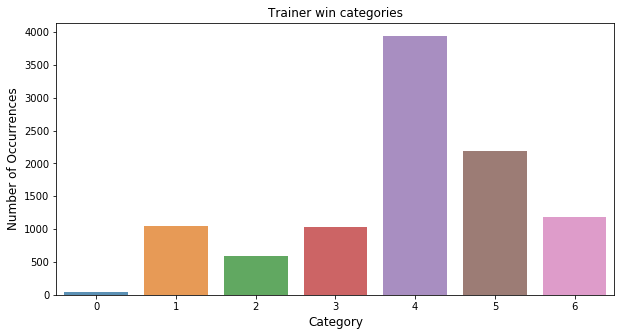

In [21]:
# This makes a dict with trainers and their corresponding wins
trainer_win_dict = dict(zip(trainers, wins))

df['trainer_wins'] = df['trainer']
df['trainer_wins'] = df['trainer_wins'].map(trainer_win_dict)
df['trainer_wins'] = df['trainer_wins'].fillna(0)
df['trainer_wins'] = df['trainer_wins'].astype(int)


# Create the categories for trainer_wins
df['trainer_wins'] = df['trainer_wins'].astype(int)
df.loc[ df['trainer_wins'] <= 10, 'trainer_wins'] = 0
df.loc[(df['trainer_wins'] > 11) & (df['trainer_wins'] <= 20), 'trainer_wins'] = 6
df.loc[(df['trainer_wins'] > 20) & (df['trainer_wins'] <= 30), 'trainer_wins'] = 5
df.loc[(df['trainer_wins'] > 30) & (df['trainer_wins'] <= 40), 'trainer_wins'] = 4
df.loc[(df['trainer_wins'] > 40) & (df['trainer_wins'] <= 50), 'trainer_wins'] = 3
df.loc[(df['trainer_wins'] > 50) & (df['trainer_wins'] <= 60), 'trainer_wins'] = 2
df.loc[(df['trainer_wins'] > 60) & (df['trainer_wins'] <= 70), 'trainer_wins'] = 1


trainer_count  = df['trainer_wins'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(trainer_count.index, trainer_count.values, alpha=0.8)
plt.title('Trainer win categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

We can now drop 'trainer' in favour of 'trainer_wins'.

In [22]:
df = df.drop(['trainer'], axis=1)

### 4. Actual Weight

We will next look at handicap weights given to horses to see if there is any trend between them and the winning horse.

In [23]:
handicaps = df['actual_weight'].unique()
handicaps.size

30

There are 30 different weight classes given to horses. Lets see how often they occur.

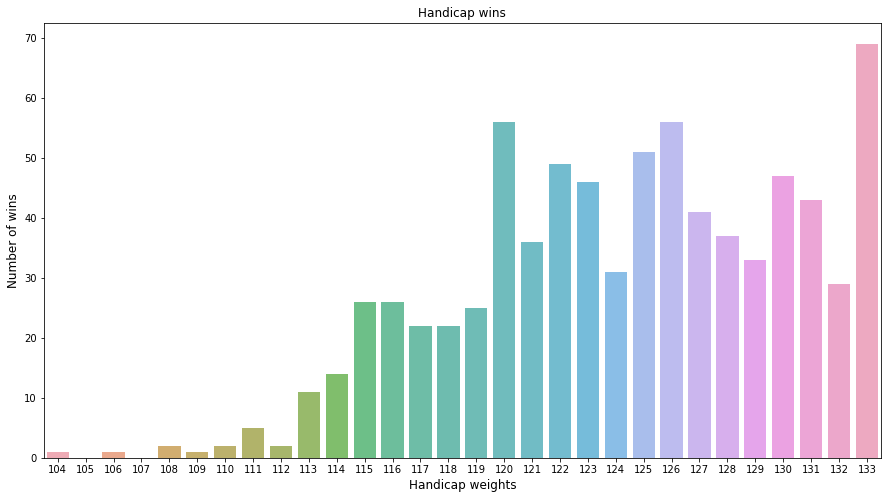

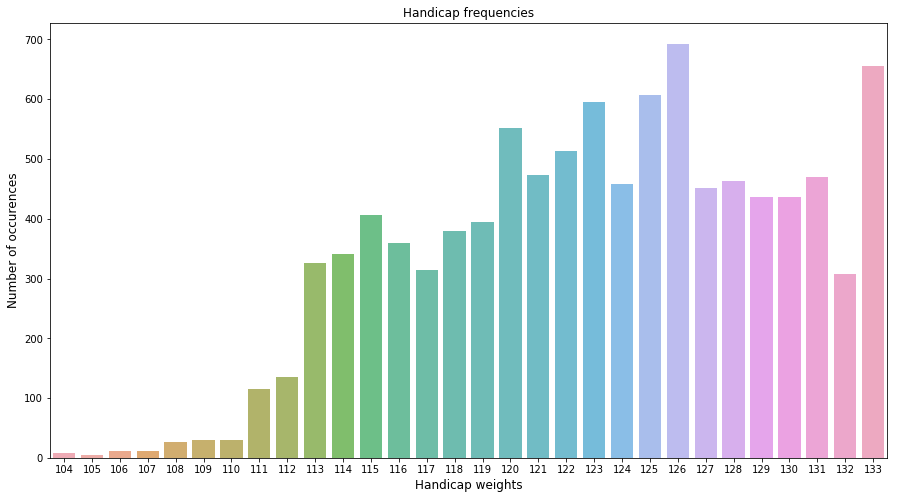

In [24]:
win_df = df.loc[df['finishing_position'] == 1]
wins = []

for h in handicaps:
    w = 0
    for row in win_df['actual_weight']:
        if(h == row):
            w+=1

    wins.append(w)

plt.figure(figsize=(15,8))
sns.barplot(handicaps, wins, alpha=0.8)
plt.title('Handicap wins')
plt.ylabel('Number of wins', fontsize=12)
plt.xlabel('Handicap weights', fontsize=12)
plt.show()

aw = df['actual_weight'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(aw.index, aw.values, alpha=0.8)
plt.title('Handicap frequencies')
plt.ylabel('Number of occurences', fontsize=12)
plt.xlabel('Handicap weights', fontsize=12)
plt.show()

#### Conclusion

The two charts above show us that there is no clear relationship between a handicap weight and winning the race.

Although horses given a handicap of 133 have won the most races, our second graph shows us that a handicap of 133 is the second most common handicap given to a horse.

The overall match up of the two distributions allows us to conclude that the handicap is doing the job it was designed for. Levelling the playing field between horses. As a result of this, we will remove 'actual_weight' from our dataset.

In [25]:
df = df.drop(['actual_weight'], axis=1)

### 5. Draw

Next, we will evaluate the relationship between a horses drawn starting position and winning the race.

In [26]:
draws = df['draw'].unique()
draws.size

15

There are 15 unique possible draws.

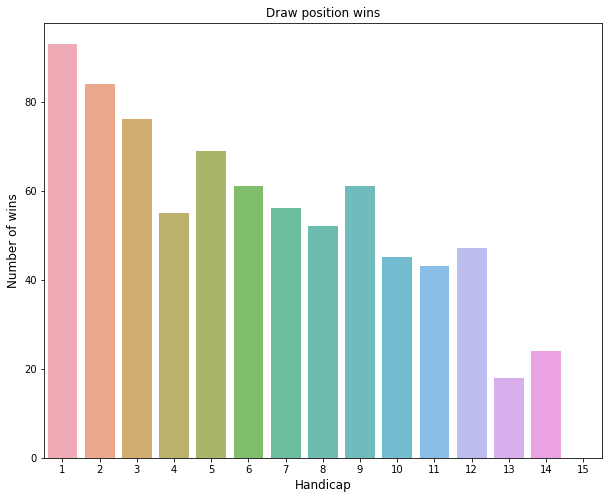

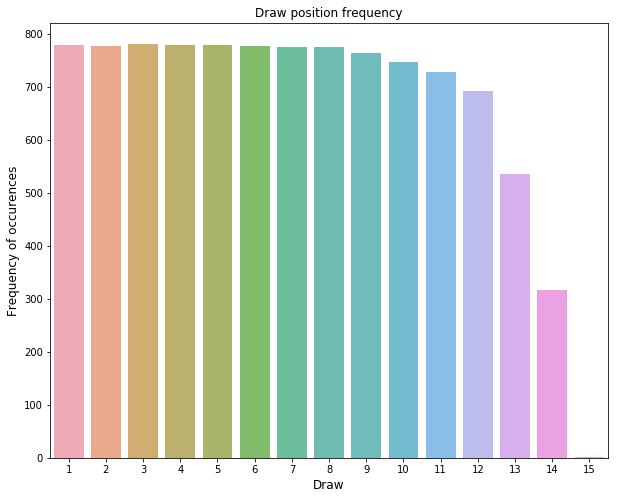

In [27]:
win_df = df.loc[df['finishing_position'] == 1]
wins = []

for d in draws:
    w = 0
    for row in win_df['draw']:
        if(d == row):
            w+=1

    wins.append(w)


draw_wins = win_df[['draw','finishing_position']]

plt.figure(figsize=(10,8))
sns.barplot(draws, wins, alpha=0.8)
plt.title('Draw position wins')
plt.ylabel('Number of wins', fontsize=12)
plt.xlabel('Handicap', fontsize=12)
plt.show()

d = df['draw'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(d.index, d.values, alpha=0.8)
plt.title('Draw position frequency')
plt.ylabel('Frequency of occurences', fontsize=12)
plt.xlabel('Draw', fontsize=12)
plt.show()

### Findings

From the two graphs above, the first checking how often a horse in a specific draw position wins and the second checking how often a horse is drawn in each position, we can draw some very interesting findings.

The second graph shows us that horses are drawn quite evenly accross each position, with numbers falling slightly towards the 9-15 range. This drop is due to many races being run with less than 15 horses.

The first graph shows us that position 1 is the most favourable position for a horse to start from, with position 2 and 3 following in second and third. Position 4 drops off somewhat while positions 5-8 maintain the same downward curve as positions 1-3. This could be due to position 4 often ending up right in the middle of races with 7-10 horses.

The high win rate of draw positions 1-3 could be contributed to the fact that those positions start near the inside railing of the racetrack, giving horses starting there an advantage and letting them get into position more easily than horses starting on the outside.

#### How to class starting position
We need a method to convert a starting position into a value which describes the desirability of the position in terms of winning the race.

By ranking the positions based on the first graph we come up with:

In [28]:
draw_wins.groupby('draw').count().sort_values(['finishing_position'], ascending=False)

,finishing_position
draw,
1,93
2,84
3,76
5,69
6,61
9,61
7,56
4,55
8,52


### Creating draw_rank

Now we'll create a new feature called draw rank to rank each starting position.

We will break them down into 5 ranks [1-5].

Text(0, 0.5, 'Number of occurences')

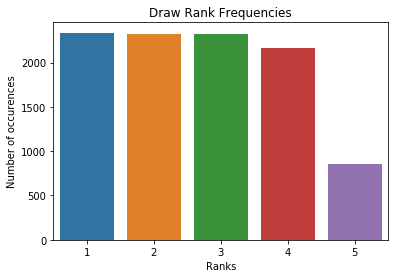

In [29]:
draws_sorted = [1,2,3,5,6,9,7,4,8,12,10,11,14,13,15]
draws_rank = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5]

draws_dict = dict(zip(draws_sorted, draws_rank))

df['draw_rank'] = df['draw']
df['draw_rank'] = df['draw_rank'].map(draws_dict)
df['draw_rank'] = df['draw_rank'].astype(int)

dr_count = df['draw_rank'].value_counts()
sns.barplot(dr_count.index, dr_count.values)
plt.title("Draw Rank Frequencies")
plt.xlabel("Ranks")
plt.ylabel("Number of occurences")

Lastly we'll drop the 'draw' feature.

In [30]:
df = df.drop(['draw'], axis=1)

### Running positions

Next we'll look at running positions to see how we might predicit the outcome using the horses position after each of the first 3 quarters of the race.

We will check how frequently a horse in a specific position, at each of the three quarters, went on to win the race.

Text(0, 0.5, 'Number of wins')

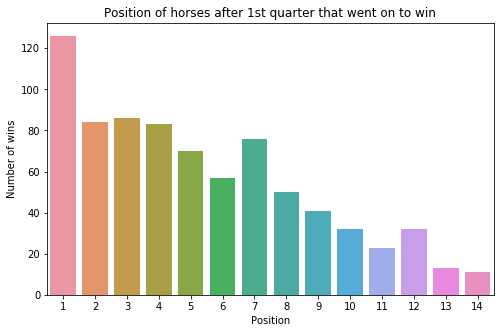

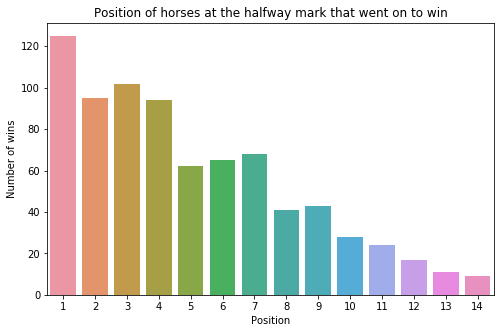

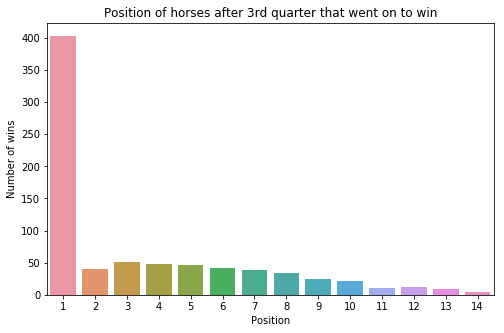

In [31]:
win_df = df.loc[df['finishing_position'] == 1]

run1 = win_df['running_position_1'].value_counts()
run2 = win_df['running_position_2'].value_counts()
run3 = win_df['running_position_3'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(run1.index, run1.values, alpha=1)
plt.title("Position of horses after 1st quarter that went on to win")
plt.xlabel("Position")
plt.ylabel("Number of wins")

plt.figure(figsize=(8,5))
sns.barplot(run2.index, run2.values, alpha=1)
plt.title("Position of horses at the halfway mark that went on to win")
plt.xlabel("Position")
plt.ylabel("Number of wins")

plt.figure(figsize=(8,5))
sns.barplot(run3.index, run3.values, alpha=1)
plt.title("Position of horses after 3rd quarter that went on to win")
plt.xlabel("Position")
plt.ylabel("Number of wins")

### Results

The results we found were mostly predictable. The horse in first position at each quarter won most often. This is most obvious when we look at the 3rd graph, as we can see that over 400 winning horses won the race having come into the last quarter in first place.

The rest of the data throws no real suprises either with the likelyhood of a horse winning decreasing the further from the front the horse is.


### 7. Win odds

The odds given to a horse by the bookies is their predicition of the horses chances of winning. Lets see how accurate the bookies were.

In [32]:
win_df = df.loc[df['finishing_position'] == 1]

win_df['win_odds'].unique().size

129

There are 129 unique odds given to horses.

Highest odds of a winning horse:

In [33]:
win_df['win_odds'].max()

99.0

Lowest odds of a winning horse:

In [34]:
win_df['win_odds'].min()

1.1

This demonstrates the massive range of odds a winning horse could have.

Lets see if there's a pattern.

Text(0, 0.5, 'Wins')

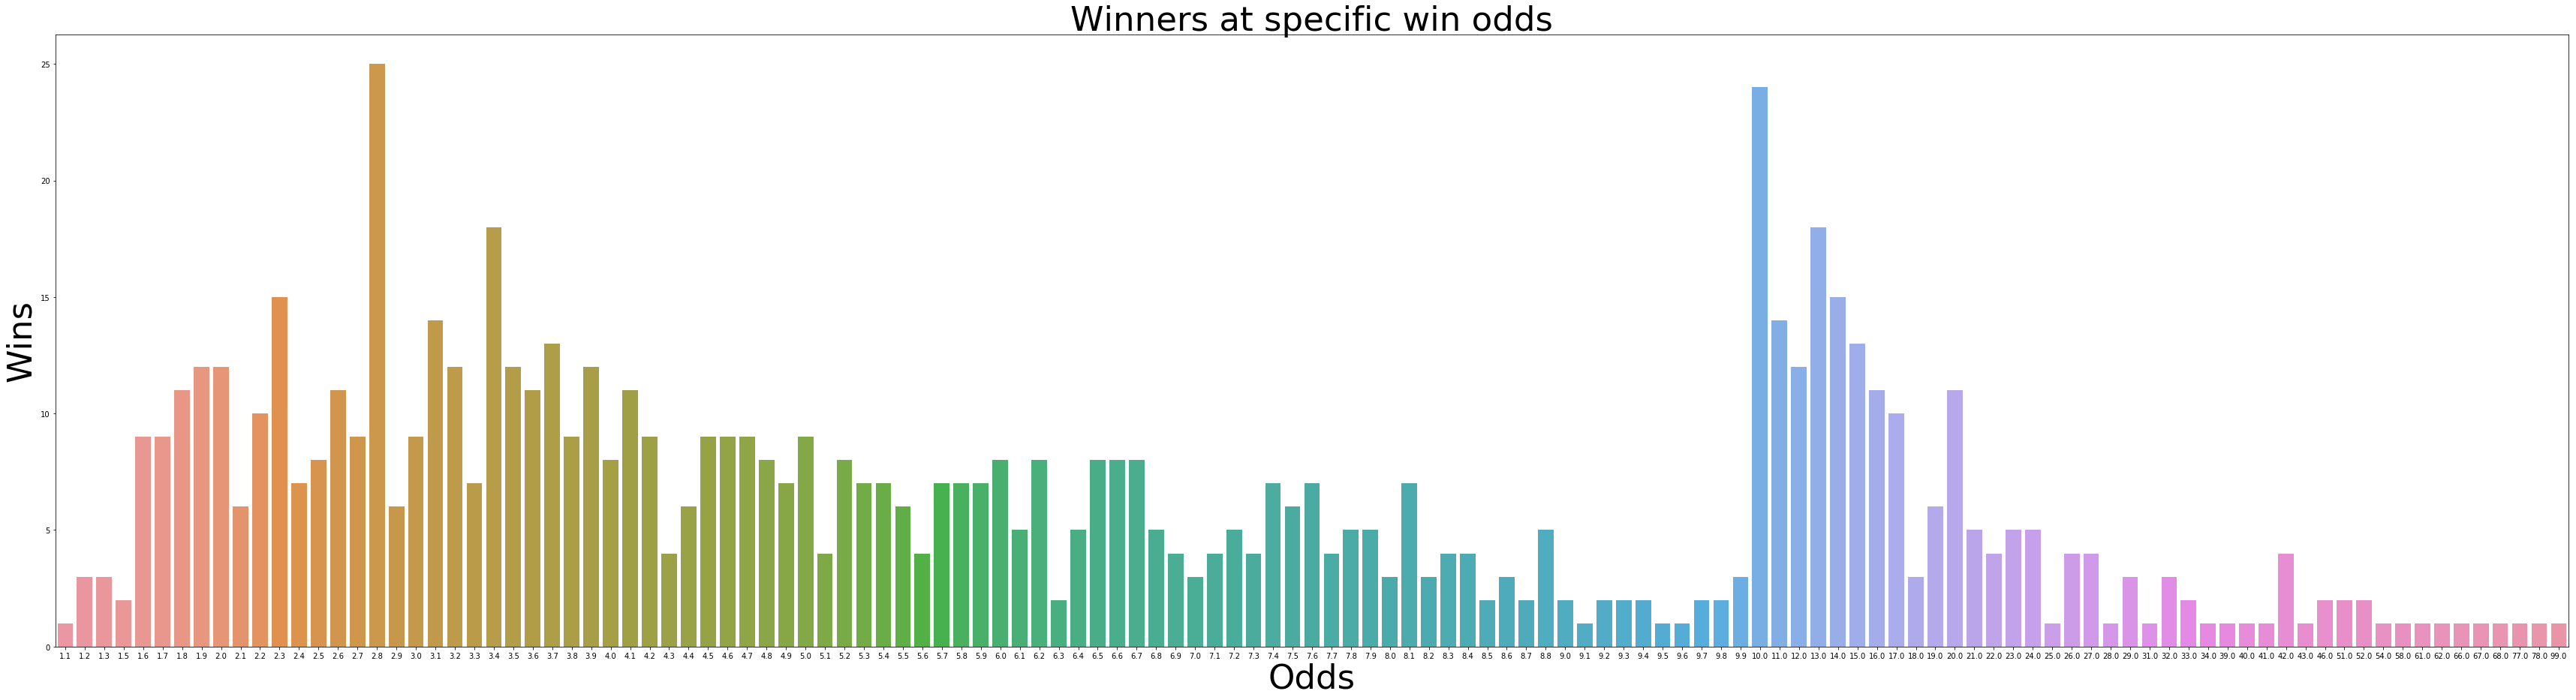

In [35]:
win_o = win_df['win_odds'].value_counts()

plt.figure(figsize=(60,15))
sns.barplot(win_o.index, win_o.values, alpha=1)
plt.title("Winners at specific win odds", fontsize="45")
plt.xlabel("Odds", fontsize="45")
plt.ylabel("Wins", fontsize="45")

The graph above is difficult to read due to its size.

The y axis goes from 0-25 and is a measure of the number of wins a particular odds price has.
The x axis goes from 1.1 to 99.0, our odds range.

The majority of wins come from horses in the lower odds ranges i.e 1.0-3.0 (red-orange area).

Another large chunk come from horses with odds between 10.0 & 13.0. (blue-purple area)

Lets see if this is merely due to most horses being priced in this range, or if there's some hidden pattern.

Text(0, 0.5, 'Occurrences')

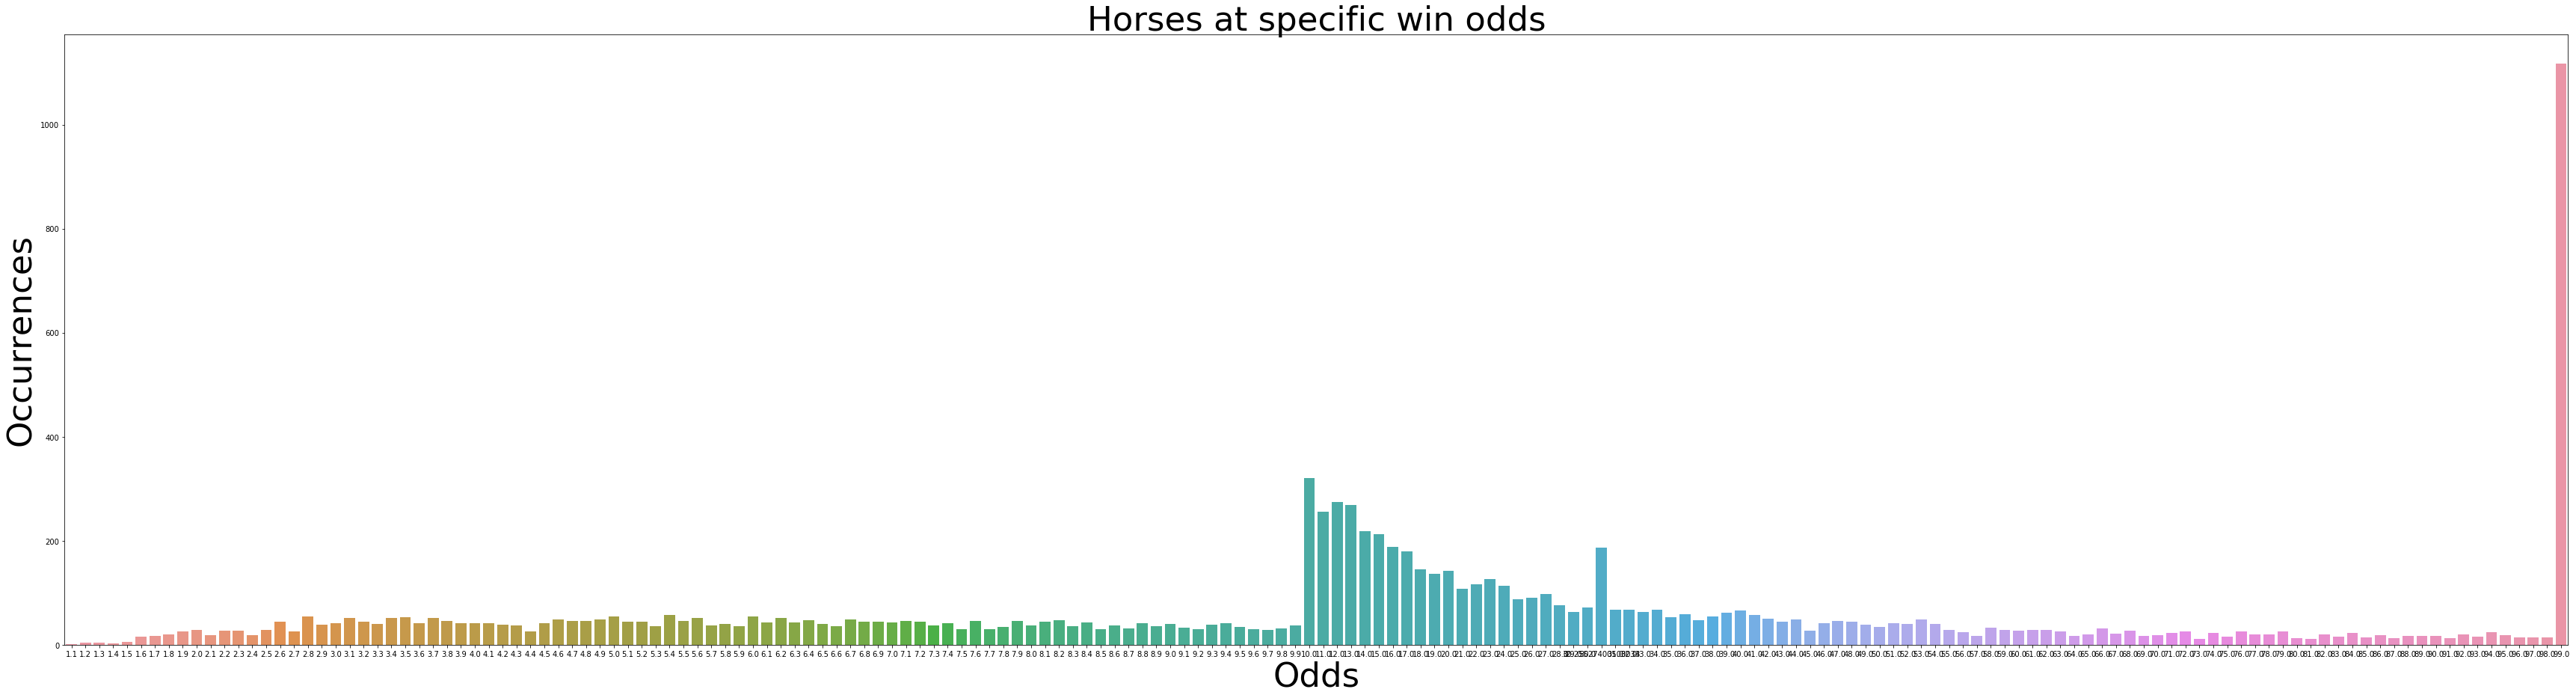

In [36]:
win_o2 = df['win_odds'].value_counts()

plt.figure(figsize=(60,15))
sns.barplot(win_o2.index, win_o2.values, alpha=1)
plt.title("Horses at specific win odds", fontsize="45")
plt.xlabel("Odds", fontsize="45")
plt.ylabel("Occurrences", fontsize="45")

Once again this is hard to read but we can explain what's happening here.

We can see that there is a large number of horses priced around the 10-13 mark (the blue spike). This contributes to the high number of winners in that price bracket we saw in the last graph. Due to the large volume of horses in this price range, there are more winners.

The number of horses in the lower price bracket 1-3 looks to be much less that those in the 10-13, while in the graph above there are still just as many if not more winners. This is simply due to the fact that when a horse is priced so low, they win more often than not.

As of writing this, we are deciding to drop 'win_odds' from our dataset and focus on building our models using the other features we've examined instead.

In [37]:
df = df.drop(['win_odds'], axis=1)

### Here is a heatmap of our feature correlations

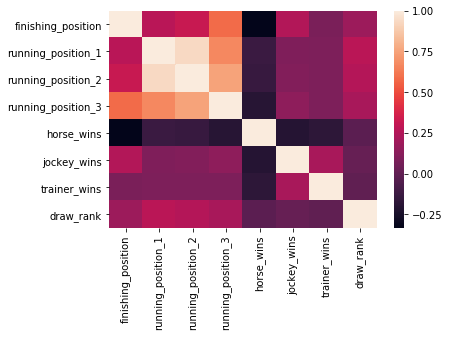

In [38]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

This heatmap shows us what features have the highest correlation to each other, and most importantly, to finishing_position.

We can see the most obvious feature with a high correlation to finishing_position is 'finishing_position_3'. 

It also shows us that 'horse_wins' holds a low correlation to finishing_position, meaning the number of win a horse has doesnt have much of an impact on their likelyhood of winning.

## Predictive Modelling

### Change finishing_position

Before we start testing various algorithms, we will change finishing_position to be either a 1 or 0.

1 will represent a win.
0 will represent a loss.

In [39]:
win_loss = {0: 0, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0}

df['finishing_position'] = df['finishing_position'].map(win_loss)

#### How the data looks now

In [40]:
df.head(10)

,finishing_position,running_position_1,running_position_2,running_position_3,horse_wins,jockey_wins,trainer_wins,draw_rank
0,1,1,2,2,1,6,5,1
1,0,8,9,9,2,5,5,5
2,0,2,1,1,2,8,4,1
3,0,6,4,5,5,1,3,1
4,0,9,10,10,0,4,4,2
5,0,12,13,13,0,8,4,4
6,0,4,3,3,0,7,4,4
7,0,5,6,6,0,8,5,3
8,0,7,7,7,0,7,5,2
9,0,11,11,12,0,8,6,3


### Split the dataset

In [41]:
# Split into training set and test set
train_df, test_df = train_test_split(df, test_size=0.2)

# Training data
X_train = train_df.drop("finishing_position", axis=1)

# What we want to predict:
Y_train = train_df["finishing_position"]

# Test data
X_test  = test_df.drop("finishing_position", axis=1)

### Random Forest Classifier

In [42]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2), "%")

99.41 %


#### Feature Importance:

In [43]:
featimp = pd.Series(random_forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print (featimp)

running_position_3    0.316018
horse_wins            0.186897
running_position_1    0.114558
running_position_2    0.113566
trainer_wins          0.094788
jockey_wins           0.091128
draw_rank             0.083045
dtype: float64


This is a very pleasing result as having studied the data in the detail we have so far, if we were to guess on which feature would provide the best guess as to which horse won, we would have said 'running_position_3'.

#### 10-fold Cross Validation

We will use random_forest again except this time we will apply 10-fold cross vaildation.

Cross validation splits our training data into folds and tests the individual folds to come up with k different results. In our case we are using 10-fold cross validation so we will get 10 different results.

In [44]:
k_fold_test = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Results:", k_fold_test)
print("Mean:", k_fold_test.mean())
print("Standard Deviation:", k_fold_test.std())

Results: [0.95505618 0.94756554 0.95375    0.9475     0.94125    0.93125
 0.9525     0.94625    0.94618273 0.94993742]
Mean: 0.9471241873034177
Standard Deviation: 0.0065735380596902175


This gives us a mean result of ~94%, down from 99.38% previously. This is still a very good score.

The standard deviation means our results can differ by ~0.007%.

### Logistic Regression

In [45]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2), "%")

92.85 %


#### 10-fold Cross Validation

In [46]:
k_fold_test = cross_val_score(logreg, X_train, Y_train, cv=10, scoring = "accuracy")
print("Results:", k_fold_test)
print("Mean:", k_fold_test.mean())
print("Standard Deviation:", k_fold_test.std())

Results: [0.93632959 0.92134831 0.93       0.91875    0.9275     0.9275
 0.93375    0.9325     0.93116395 0.9261577 ]
Mean: 0.9284999554686804
Standard Deviation: 0.00517597421888574


Here we see a very minor change in results after using cross validation.

### Perceptron

In [47]:
# Perceptron
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

92.89 %


#### 10-fold Cross Validation

In [48]:
k_fold_test = cross_val_score(perceptron, X_train, Y_train, cv=10, scoring = "accuracy")
print("Results:", k_fold_test)
print("Mean:", k_fold_test.mean())
print("Standard Deviation:", k_fold_test.std())

Results: [0.93383271 0.93133583 0.91875    0.86125    0.93       0.8575
 0.93375    0.9125     0.93241552 0.30162703]
Mean: 0.8512961092517332
Standard Deviation: 0.18530017722794026


By using 10-fold cross validation on the perceptron classifier we can see the varying scores our model recieves.

## Roc Curves

### Random Forest

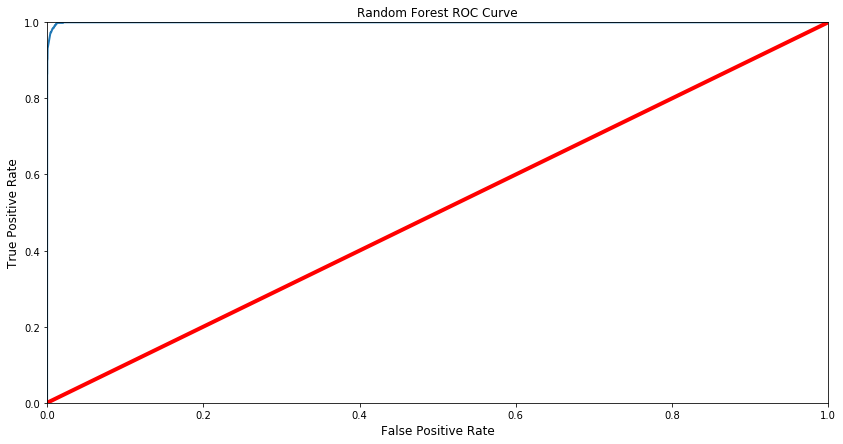

AUC Score: 0.9996194256148679


In [49]:
probs = random_forest.predict_proba(X_train)
probs = probs[:,1]

fpr, tpr, t = roc_curve(Y_train, probs)

plt.figure(figsize=(14, 7))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

roc_score = roc_auc_score(Y_train, probs)
print("AUC Score:", roc_score)

### Logistic Regression

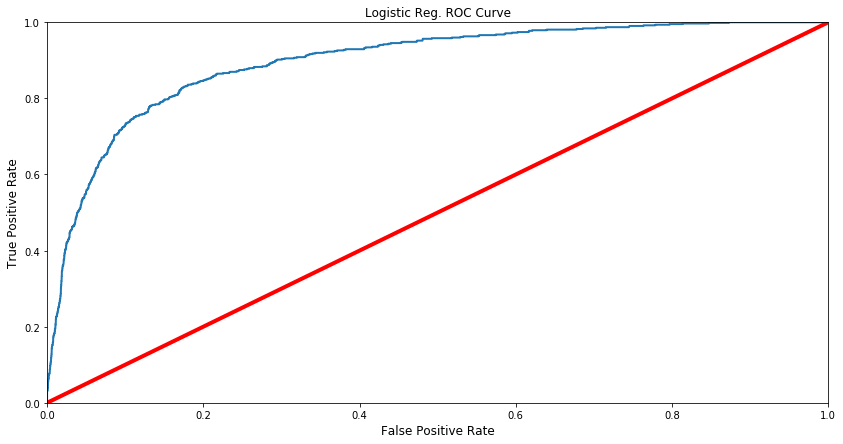

AUC Score: 0.896933636020532


In [50]:
probs = logreg.predict_proba(X_train)
probs = probs[:,1]

fpr, tpr, t = roc_curve(Y_train, probs)

plt.figure(figsize=(14, 7))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.title('Logistic Reg. ROC Curve')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.show()

roc_score = roc_auc_score(Y_train, probs)
print("AUC Score:", roc_score)

### ROC Analysis

These two ROC curves look very different to each other.

An ROC curve illustrates the accuracy of a predictive model. The most basic way to describe it is that the closer to the top left corner the curve is, the more accurate the model.

Using random forest we can see that our ROC curve shows a high level of accuracy.

We see that accuracy drop off when the logistic regression algorithm is used, but the curve still indicates a high level of accuracy for our model.

## Project Conclusion

Overall in our project, we fell like we made some very interesting findings using the dataset. Through our dataset analysis we grew familiar with the different features our dataset provided and how they might be converted as part of our predictive model.

We quickly picked out which features would be useful in predicting which horse won the race and which features could be dropped. From our initial dataset we made many changes, removing or adapting any non numeric features and adding new ones of our own.

Here is the difference in how our data looked at the beginning and at the end:

### Before

In [51]:
df_example.head(10)

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,race_id
0,1.0,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1.0,-,1.0,2.0,2.0,1.0,1.22.33,3.8,2014-001
1,2.0,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,13.0,2,8.0,9.0,9.0,2.0,1.22.65,8.0,2014-001
2,3.0,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,3.0,2,2.0,1.0,1.0,3.0,1.22.66,5.7,2014-001
3,4.0,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,2.0,2,6.0,4.0,5.0,4.0,1.22.66,6.1,2014-001
4,5.0,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,9.0,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,2014-001
5,6.0,9.0,WINNING ADVANTAGE,N359,A Suborics,A T Millard,123,11.0,5-1/2,12.0,13.0,13.0,6.0,1.23.20,24.0,2014-001
6,7.0,13.0,CARE FREE ELEGANCE,P340,C Y Ho,K L Man,115,12.0,5-1/2,4.0,3.0,3.0,7.0,1.23.22,99.0,2014-001
7,8.0,4.0,COOL PAL,S035,H W Lai,L Ho,129,8.0,5-3/4,5.0,6.0,6.0,8.0,1.23.25,21.0,2014-001
8,9.0,6.0,TAI PO FORTUNE,P081,K Teetan,T P Yung,127,6.0,6-1/4,7.0,7.0,7.0,9.0,1.23.33,10.0,2014-001
9,10.0,11.0,SUPER HORSE,L308,T H So,C W Chang,119,7.0,6-3/4,11.0,11.0,12.0,10.0,1.23.41,27.0,2014-001


### After

In [52]:
df.head(10)

,finishing_position,running_position_1,running_position_2,running_position_3,horse_wins,jockey_wins,trainer_wins,draw_rank
0,1,1,2,2,1,6,5,1
1,0,8,9,9,2,5,5,5
2,0,2,1,1,2,8,4,1
3,0,6,4,5,5,1,3,1
4,0,9,10,10,0,4,4,2
5,0,12,13,13,0,8,4,4
6,0,4,3,3,0,7,4,4
7,0,5,6,6,0,8,5,3
8,0,7,7,7,0,7,5,2
9,0,11,11,12,0,8,6,3


The process of converting all of the features in our dataset allowed us to create a more suitable input for the machine learning algorithms we chose.

### Some interesting findings

We found that the handicap weight a horse was given had little impact on the horse winning the race. We saw that the handicap weights with the most wins were also the most common weights.

We found that the 'draw' or starting position for the horses had a big impact on the horses chances of winning. We saw that most of the positions were even distributed accross the dataset, while the wins were biased towards the lower number starting gates.
Positions 1-3 held the most winners which told us that there must be some advantage to a horse starting from these gates. We drew the assumption that gates 1-3 were closed to the inside of the race track, meaning horses would have to cover less ground to get into position on the inside of bends.

### ML Algorithms

Our results from using 3 different machine learning algorithms (random forest, logistic regression, perceptron) indicated to us that the model we developed was accurate at predicting if a horse was the winner of a race based on the features we developed. Random forest scored the highest, with logistic regression in second and percepron in third.

We performed 10-fold cross validation on our results for these algorithms and saw our model accuracy scores drop only slightly, further afirming our satisfaction with the model.

### Final word

Lastly, we just wanted to say that we found this exercise to be a great learning experience and appreciate the value of this project. This type of data analysis and predictive model creation is highly applicable in lots of areas and we feel like we have made a start to aquiring a valuable new skill.